#### [ 의료 기관 유지에 미치는 변수 분석 ]

>>> 지역 불균형 확인

1. 모델 로드<hr>

In [1]:
# 모델 로드
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

2.데이터 확인
- 1) 시도별 종별 요양기관 현황 (출처 : 통계청)

In [2]:
CareFacility=pd.read_excel('../data/시도별 종별 요양기관 현황.xlsx')
CareFacility

,요양기관종별,시도별,항목,단위,2009.1/4,2009.2/4,2009.3/4,2009.4/4,2010.1/4,2010.2/4,...,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4,2023.3/4,2023.4/4,2024.1/4,2024.2/4
0,계,계,요양기관현황[개소],개소,78829.0,79456.0,79889.0,80270.0,80632.0,81142.0,...,99028,99645,100170,100396,100827,101197,101512,101762,102197,102634
1,계,서울특별시,요양기관현황[개소],개소,20176.0,20322.0,20472.0,20560.0,20683.0,20815.0,...,23781,23910,24024,24069,24145,24211,24300,24364,24503,24658
2,계,부산광역시,요양기관현황[개소],개소,5804.0,5834.0,5859.0,5864.0,5863.0,5901.0,...,7010,7077,7125,7141,7169,7173,7183,7209,7227,7244
3,계,대구광역시,요양기관현황[개소],개소,4204.0,4243.0,4262.0,4273.0,4304.0,4338.0,...,5270,5282,5299,5314,5332,5366,5442,5461,5494,5506
4,계,인천광역시,요양기관현황[개소],개소,3590.0,3609.0,3614.0,3643.0,3648.0,3657.0,...,4734,4793,4841,4863,4884,4921,4949,4971,4993,5044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,약국,전북특별자치도,요양기관현황[개소],개소,853.0,853.0,856.0,862.0,871.0,876.0,...,962,975,974,972,975,980,985,986,992,994
302,약국,전라남도,요양기관현황[개소],개소,804.0,809.0,808.0,803.0,803.0,803.0,...,834,836,845,844,852,853,848,849,849,850
303,약국,경상북도,요양기관현황[개소],개소,1040.0,1050.0,1050.0,1049.0,1048.0,1046.0,...,1098,1099,1105,1103,1108,1105,1099,1095,1103,1106
304,약국,경상남도,요양기관현황[개소],개소,1101.0,1110.0,1115.0,1127.0,1131.0,1130.0,...,1354,1364,1362,1370,1377,1375,1374,1372,1383,1382


- 1-1. 데이터 전처리

In [3]:
# 데이터 info() 확인
CareFacility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   요양기관종별    306 non-null    object 
 1   시도별       306 non-null    object 
 2   항목        306 non-null    object 
 3   단위        306 non-null    object 
 4   2009.1/4  272 non-null    float64
 5   2009.2/4  272 non-null    float64
 6   2009.3/4  272 non-null    float64
 7   2009.4/4  272 non-null    float64
 8   2010.1/4  272 non-null    float64
 9   2010.2/4  272 non-null    float64
 10  2010.3/4  272 non-null    float64
 11  2010.4/4  272 non-null    float64
 12  2011.1/4  272 non-null    float64
 13  2011.2/4  272 non-null    float64
 14  2011.3/4  272 non-null    float64
 15  2011.4/4  272 non-null    float64
 16  2012.1/4  272 non-null    float64
 17  2012.2/4  272 non-null    float64
 18  2012.3/4  288 non-null    float64
 19  2012.4/4  288 non-null    float64
 20  2013.1/4  288 non-null    float6

In [4]:
# 결측치 확인
CareFacility.isna().sum()

요양기관종별       0
시도별          0
항목           0
단위           0
2009.1/4    34
            ..
2023.2/4     0
2023.3/4     0
2023.4/4     0
2024.1/4     0
2024.2/4     0
Length: 66, dtype: int64

In [5]:
# 결측치 0 으로 채우기
CareFacility=CareFacility.fillna(0)

In [6]:
CareFacility.isna().sum()

요양기관종별      0
시도별         0
항목          0
단위          0
2009.1/4    0
           ..
2023.2/4    0
2023.3/4    0
2023.4/4    0
2024.1/4    0
2024.2/4    0
Length: 66, dtype: int64

In [7]:
CareFacility2=CareFacility[1:18]
CareFacility2

,요양기관종별,시도별,항목,단위,2009.1/4,2009.2/4,2009.3/4,2009.4/4,2010.1/4,2010.2/4,...,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4,2023.3/4,2023.4/4,2024.1/4,2024.2/4
1,계,서울특별시,요양기관현황[개소],개소,20176.0,20322.0,20472.0,20560.0,20683.0,20815.0,...,23781,23910,24024,24069,24145,24211,24300,24364,24503,24658
2,계,부산광역시,요양기관현황[개소],개소,5804.0,5834.0,5859.0,5864.0,5863.0,5901.0,...,7010,7077,7125,7141,7169,7173,7183,7209,7227,7244
3,계,대구광역시,요양기관현황[개소],개소,4204.0,4243.0,4262.0,4273.0,4304.0,4338.0,...,5270,5282,5299,5314,5332,5366,5442,5461,5494,5506
4,계,인천광역시,요양기관현황[개소],개소,3590.0,3609.0,3614.0,3643.0,3648.0,3657.0,...,4734,4793,4841,4863,4884,4921,4949,4971,4993,5044
5,계,광주광역시,요양기관현황[개소],개소,2293.0,2331.0,2357.0,2370.0,2379.0,2393.0,...,2939,2963,2982,2996,3018,3018,3017,3023,3031,3042
6,계,대전광역시,요양기관현황[개소],개소,2575.0,2584.0,2582.0,2594.0,2599.0,2611.0,...,3093,3096,3106,3094,3097,3099,3089,3086,3089,3116
7,계,울산광역시,요양기관현황[개소],개소,1503.0,1516.0,1527.0,1547.0,1558.0,1569.0,...,1834,1839,1843,1847,1847,1857,1860,1865,1866,1865
8,계,세종특별자치시,요양기관현황[개소],개소,0.0,0.0,0.0,0.0,0.0,0.0,...,567,577,580,590,600,606,610,619,620,622
9,계,경기도,요양기관현황[개소],개소,15530.0,15662.0,15784.0,15904.0,16014.0,16177.0,...,21968,22186,22366,22448,22618,22785,22920,23007,23161,23269
10,계,강원특별자치도,요양기관현황[개소],개소,2190.0,2214.0,2217.0,2226.0,2234.0,2241.0,...,2625,2630,2640,2645,2644,2647,2656,2657,2670,2669


In [8]:
CareFacility2=CareFacility2.drop(columns=['요양기관종별','항목','단위'], axis=1)
CareFacility2

,시도별,2009.1/4,2009.2/4,2009.3/4,2009.4/4,2010.1/4,2010.2/4,2010.3/4,2010.4/4,2011.1/4,...,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4,2023.3/4,2023.4/4,2024.1/4,2024.2/4
1,서울특별시,20176.0,20322.0,20472.0,20560.0,20683.0,20815.0,20917.0,20887.0,20999.0,...,23781,23910,24024,24069,24145,24211,24300,24364,24503,24658
2,부산광역시,5804.0,5834.0,5859.0,5864.0,5863.0,5901.0,5932.0,5943.0,5985.0,...,7010,7077,7125,7141,7169,7173,7183,7209,7227,7244
3,대구광역시,4204.0,4243.0,4262.0,4273.0,4304.0,4338.0,4358.0,4373.0,4409.0,...,5270,5282,5299,5314,5332,5366,5442,5461,5494,5506
4,인천광역시,3590.0,3609.0,3614.0,3643.0,3648.0,3657.0,3664.0,3672.0,3717.0,...,4734,4793,4841,4863,4884,4921,4949,4971,4993,5044
5,광주광역시,2293.0,2331.0,2357.0,2370.0,2379.0,2393.0,2405.0,2430.0,2455.0,...,2939,2963,2982,2996,3018,3018,3017,3023,3031,3042
6,대전광역시,2575.0,2584.0,2582.0,2594.0,2599.0,2611.0,2629.0,2622.0,2622.0,...,3093,3096,3106,3094,3097,3099,3089,3086,3089,3116
7,울산광역시,1503.0,1516.0,1527.0,1547.0,1558.0,1569.0,1584.0,1588.0,1595.0,...,1834,1839,1843,1847,1847,1857,1860,1865,1866,1865
8,세종특별자치시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,567,577,580,590,600,606,610,619,620,622
9,경기도,15530.0,15662.0,15784.0,15904.0,16014.0,16177.0,16276.0,16331.0,16450.0,...,21968,22186,22366,22448,22618,22785,22920,23007,23161,23269
10,강원특별자치도,2190.0,2214.0,2217.0,2226.0,2234.0,2241.0,2240.0,2248.0,2260.0,...,2625,2630,2640,2645,2644,2647,2656,2657,2670,2669


In [31]:
CareFacility3=CareFacility2.T
CareFacility3

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
시도별,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도
2009.1/4,20176.0,5804.0,4204.0,3590.0,2293.0,2575.0,1503.0,0.0,15530.0,2190.0,2322.0,3121.0,3257.0,3015.0,3944.0,4451.0,854.0
2009.2/4,20322.0,5834.0,4243.0,3609.0,2331.0,2584.0,1516.0,0.0,15662.0,2214.0,2329.0,3158.0,3264.0,3046.0,3982.0,4502.0,860.0
2009.3/4,20472.0,5859.0,4262.0,3614.0,2357.0,2582.0,1527.0,0.0,15784.0,2217.0,2324.0,3165.0,3271.0,3054.0,3999.0,4536.0,866.0
2009.4/4,20560.0,5864.0,4273.0,3643.0,2370.0,2594.0,1547.0,0.0,15904.0,2226.0,2336.0,3191.0,3296.0,3050.0,3993.0,4558.0,865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023.2/4,24211,7173,5366,4921,3018,3099,1857,606,22785,2647,2913,3774,3895,3495,4515,5576,1346
2023.3/4,24300,7183,5442,4949,3017,3089,1860,610,22920,2656,2922,3775,3907,3477,4478,5571,1356
2023.4/4,24364,7209,5461,4971,3023,3086,1865,619,23007,2657,2923,3791,3911,3476,4472,5574,1353
2024.1/4,24503,7227,5494,4993,3031,3089,1866,620,23161,2670,2921,3805,3923,3469,4487,5581,1357


In [35]:
CareFacility3.columns = CareFacility3.loc['시도별']
CareFacility3=CareFacility3.iloc[1:]
CareFacility3


시도별,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도
2009.1/4,20176.0,5804.0,4204.0,3590.0,2293.0,2575.0,1503.0,0.0,15530.0,2190.0,2322.0,3121.0,3257.0,3015.0,3944.0,4451.0,854.0
2009.2/4,20322.0,5834.0,4243.0,3609.0,2331.0,2584.0,1516.0,0.0,15662.0,2214.0,2329.0,3158.0,3264.0,3046.0,3982.0,4502.0,860.0
2009.3/4,20472.0,5859.0,4262.0,3614.0,2357.0,2582.0,1527.0,0.0,15784.0,2217.0,2324.0,3165.0,3271.0,3054.0,3999.0,4536.0,866.0
2009.4/4,20560.0,5864.0,4273.0,3643.0,2370.0,2594.0,1547.0,0.0,15904.0,2226.0,2336.0,3191.0,3296.0,3050.0,3993.0,4558.0,865.0
2010.1/4,20683.0,5863.0,4304.0,3648.0,2379.0,2599.0,1558.0,0.0,16014.0,2234.0,2334.0,3208.0,3302.0,3054.0,3997.0,4589.0,866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023.2/4,24211,7173,5366,4921,3018,3099,1857,606,22785,2647,2913,3774,3895,3495,4515,5576,1346
2023.3/4,24300,7183,5442,4949,3017,3089,1860,610,22920,2656,2922,3775,3907,3477,4478,5571,1356
2023.4/4,24364,7209,5461,4971,3023,3086,1865,619,23007,2657,2923,3791,3911,3476,4472,5574,1353
2024.1/4,24503,7227,5494,4993,3031,3089,1866,620,23161,2670,2921,3805,3923,3469,4487,5581,1357


In [50]:
CareFacility3.index[0]

'2009.1/4'

In [51]:
CareFacility3.columns.unique()

Index(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'],
      dtype='object', name='시도별')

In [70]:
CareFacility3['강원특별자치도'].values

array([2190.0, 2214.0, 2217.0, 2226.0, 2234.0, 2241.0, 2240.0, 2248.0,
       2260.0, 2271.0, 2250.0, 2257.0, 2266.0, 2281.0, 2285.0, 2299.0,
       2304.0, 2325.0, 2332.0, 2337.0, 2348.0, 2357.0, 2366.0, 2362.0,
       2378.0, 2396.0, 2412.0, 2402.0, 2418.0, 2431.0, 2441.0, 2440.0,
       2447.0, 2449.0, 2461.0, 2463.0, 2467.0, 2478.0, 2497.0, 2497.0,
       2501.0, 2505.0, 2512.0, 2519.0, 2545.0, 2554.0, 2571.0, 2578.0,
       2588, 2597, 2616, 2619, 2625, 2630, 2640, 2645, 2644, 2647, 2656,
       2657, 2670, 2669], dtype=object)

In [81]:
CareFacility3.index.values

array(['2009.1/4', '2009.2/4', '2009.3/4', '2009.4/4', '2010.1/4',
       '2010.2/4', '2010.3/4', '2010.4/4', '2011.1/4', '2011.2/4',
       '2011.3/4', '2011.4/4', '2012.1/4', '2012.2/4', '2012.3/4',
       '2012.4/4', '2013.1/4', '2013.2/4', '2013.3/4', '2013.4/4',
       '2014.1/4', '2014.2/4', '2014.3/4', '2014.4/4', '2015.1/4',
       '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4', '2016.2/4',
       '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4',
       '2019.1/4', '2019.2/4', '2019.3/4', '2019.4/4', '2020.1/4',
       '2020.2/4', '2020.3/4', '2020.4/4', '2021.1/4', '2021.2/4',
       '2021.3/4', '2021.4/4', '2022.1/4', '2022.2/4', '2022.3/4',
       '2022.4/4', '2023.1/4', '2023.2/4', '2023.3/4', '2023.4/4',
       '2024.1/4', '2024.2/4'], dtype=object)

In [86]:
# 선그래프 만들기

def drawLineGraph(title,DF):
    area=DF.columns.unique()
    year=DF.index
    plt.figure(figsize=(16, 7))

    for a in area:
        plt.plot(year.values,DF[a].values, label=a)
    
    plt.title(f'[{title}]')
    plt.xlabel('연도') 
    plt.ylabel('개소')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('img/' + title + '.png',dpi=100)
    plt.show()
    plt.close()

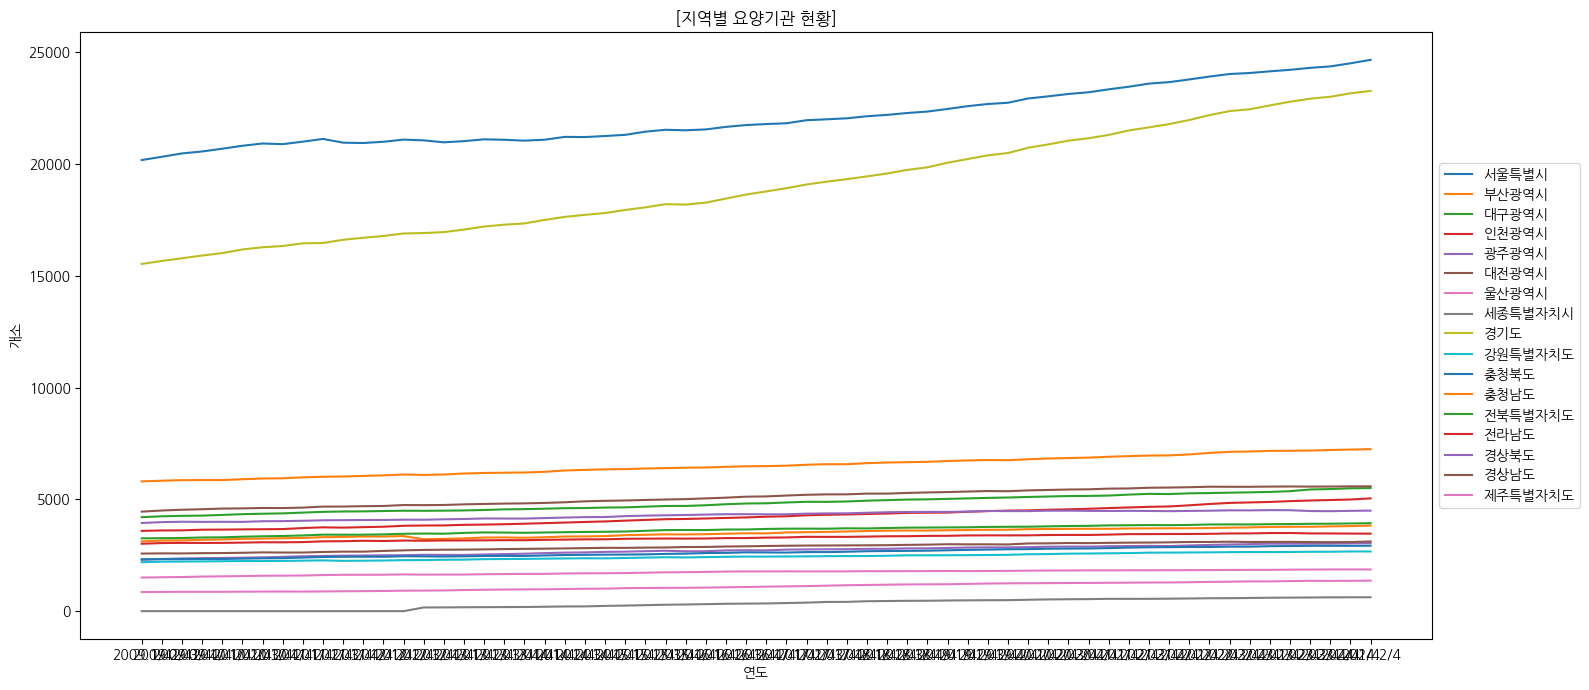

In [87]:
drawLineGraph('지역별 요양기관 현황',CareFacility3)